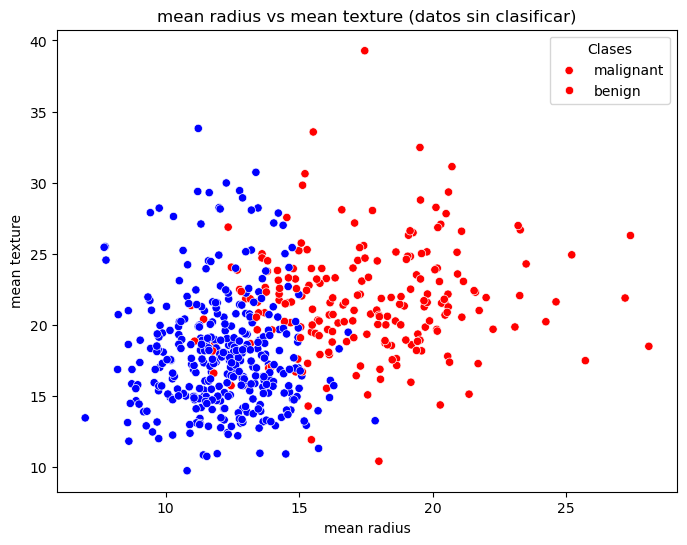

In [4]:
# Importamos las bibliotecas para traer e imprimi el dataset.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Cargamos el dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Scatterplot con dos características (diagrama de dispersión).
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="mean radius",
    y="mean texture",
    hue="target",
    palette={0: "red", 1: "blue"},
    data=df
)
plt.title("mean radius vs mean texture (datos sin clasificar)")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.legend(title="Clases", labels=data.target_names)
plt.show()

In [5]:
# Importamos de la biblioteca el dataset, el modelo y las métricas.
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargamos el dataset y preparamos las datos y etiquetas.
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

# Mostramos la cantidad de muestras y las categorías que trae el dataset.
print("Shape X:", x.shape, "Shape y:", y.shape, "\n")
print("Variables:", cancer.feature_names, "\n")

# Separamos los datos para entrenar al modelo.
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.3, random_state = 42
)

# Creamos y entrenamos el modelo.
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)

# Clasificación de muestras.
y_pred = knc.predict(x_test)

# Aplicamos las métricas al modelo.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimimos las métricas.
print("Métricas")
print(f"Accuracy: {accuracy: .4f}")
print(f"Precision:{precision: .4f}")
print(f"Recall:   {recall: .4f}")
print(f"F1:       {f1: .4f}")

Shape X: (569, 30) Shape y: (569,) 

Variables: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Métricas
Accuracy:  0.9591
Precision: 0.9469
Recall:    0.9907
F1:        0.9683


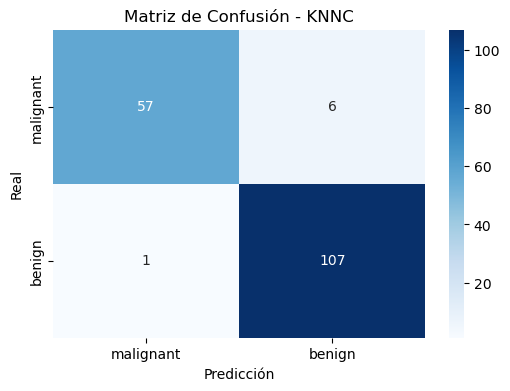

In [6]:
# Importamos las bibliotecas para crear la matriz de confución.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.title("Matriz de Confusión - KNNC")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [ ]:
# Importamos las bibliotecas para imprimir los resultados del modelo.
import matplotlib.pyplot as plt
import numpy as np

# Elegimos dos características para graficar (mean radius y mean texture).
feature_x = 0  # índice de la característica X (mean radius).
feature_y = 1  # índice de la característica Y (mean texture).

# Colores según clase real.
colors = np.array(['red', 'blue'])  # 0 = malignant (rojo), 1 = benign (verde).

plt.figure(figsize=(8,6))

# Iteramos sobre cada muestra y pintamos con forma diferente si acierta o falla.
for i in range(len(x_test)):
    if y_test[i] == y_pred[i]:
        marker = "o"  # acierto = círculo.
    else:
        marker = "x"  # error = cruz.
    
    plt.scatter(
        x_test[i, feature_x],
        x_test[i, feature_y],
        c=colors[y_test[i]],
        marker=marker,
        edgecolor="k",
        s=80
    )

plt.xlabel(cancer.feature_names[feature_x])
plt.ylabel(cancer.feature_names[feature_y])
plt.title("KNNC - Comparación Real vs Predicción")
plt.show()

C:\Users\enano\AppData\Local\Temp\ipykernel_7636\2506757573.py:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(
